In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.insert(0, '../src')

In [38]:
import jax
import jax.numpy as np
import jax.random as random
from jax import jit, grad, value_and_grad, random, lax
from jax.random import split
from jax.experimental import stax, optimizers

import matplotlib.pyplot as plt

from lib import *
from sine.data import sample_tasks

rng = random.PRNGKey(0)

In [26]:
xrange_inputs = np.linspace(-5,5,100).reshape((100, 1)) # (k, 1)
targets = np.sin(xrange_inputs)

In [39]:
net_init, net_apply = stax.serial(
    stax.Dense(40), stax.Relu,
    stax.Dense(40), stax.Relu,
    stax.Dense(1),
)

def make_net(rng, in_shape=(-1, 1)):
    out_shape, net_params = net_init(rng, in_shape)
    return net_params

@jit
def forward(net_apply, params, x, y):
    preds = net_apply(params, x)
    loss = mse_loss(preds, y)
    return loss, preds

@jit
def grad_step(i, net_apply, p, x, y, opt_update):
    (loss, preds), grad = value_and_grad(forward, has_aux=True)(
        net_apply, p, x, y,
    )
    opt_state = opt_update(i, grad, opt_state)
    return loss, preds, opt_state

def k_grad_steps()

In [36]:
(rng_net,) = split(rng, 1)
params = make_net(rng_net)

NameError: name 'net_params' is not defined

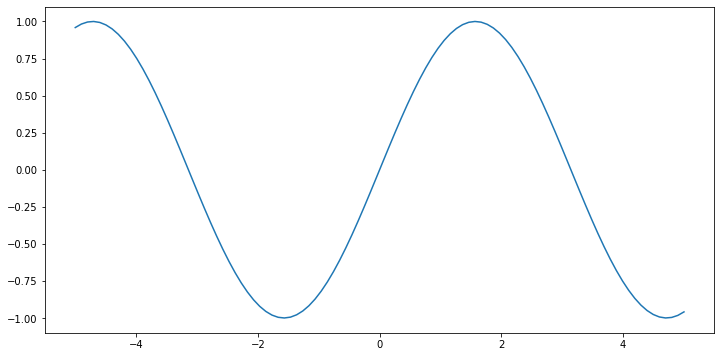

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(xrange_inputs, targets, label="Target")

net = make_net(rng)
opt_init, opt_update, get_params = optimizers.sgd(1e-1)
opt_state = opt_init(net.params)

ax.plot(xrange_inputs, net_apply(net_params, xrange_inputs), label="0 steps")
plot_steps = [1, 2, 5, 10, 50, 100]
for i in range(1, 101):
    
    
    loss, grads = value_and_grad(mse_loss)(net_params, xrange_inputs, targets)
    opt_state = opt_update(i - 1, grads, opt_state)
    net_params = get_params(opt_state)
    
    if i in plot_steps:
        preds = net_apply(net_params, xrange_inputs)
        ax.plot(xrange_inputs, preds, label="%d steps" % i)

pointwise_loss = (preds - targets) ** 2
ax.plot(xrange_inputs, pointwise_loss, linestyle='-.', label="Final loss")
ax.legend()